<a href="https://colab.research.google.com/github/dinesh-m/venture_capital_analyzer/blob/main/GC_venture_funding_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [330]:
# Import libraries and packages
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

print('Libraries and packages imported')

Libraries and packages imported


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [331]:
# Upload credit_card_transactions.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving applicants_data.csv to applicants_data.csv


In [332]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv('applicants_data.csv')

# Review the DataFrame
print('First 5 rows of the applicants_data.csv input file')
display(applicant_data_df.head())

print('Last 5 rows of the applicants_data.csv input file')
display(applicant_data_df.tail())

First 5 rows of the applicants_data.csv input file


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


Last 5 rows of the applicants_data.csv input file


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,996086871,WATERHOUSE CHARITABLE TR,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


In [333]:
# Review the data types associated with the columns
print('Review the data types associated with the columns')
applicant_data_df.dtypes

Review the data types associated with the columns


EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [334]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df =applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
print('Droped the EIN and NAME columns from the DataFrame')

display(applicant_data_df.head())

display(applicant_data_df.tail())

Droped the EIN and NAME columns from the DataFrame


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [335]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == 'object'].index)

# Display the categorical variables list
print('Display the categorical variables list')
categorical_variables

Display the categorical variables list


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [336]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [337]:
# Encode the categorical variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [338]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
print('List of additional columns generated by OneHotEncoder')
display(encoded_df.head())

display(encoded_df.tail())

List of additional columns generated by OneHotEncoder


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [339]:
# View the newly added columns generated out of categorical_variables
list(encoded_df.columns)

['APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T12',
 'APPLICATION_TYPE_T13',
 'APPLICATION_TYPE_T14',
 'APPLICATION_TYPE_T15',
 'APPLICATION_TYPE_T17',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T2',
 'APPLICATION_TYPE_T25',
 'APPLICATION_TYPE_T29',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'APPLICATION_TYPE_T9',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C0',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C1230',
 'CLASSIFICATION_C1234',
 'CLASSIFICATION_C1235',
 'CLASSIFICATION_C1236',
 'CLASSIFICATION_C1237',
 'CLASSIFICATION_C1238',
 'CLASSIFICATION_C1240',
 'CLASSIFICATION_C1245',
 'CLASSIFICATION_C1246',
 'CLASSIFICATION_C1248',
 'CLASSIFICATION_C1250',
 'CLASSIFICATION_C1256',
 'CLASSIFICATION_C1257',
 'CLASSIFICATION_C1260'

### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [340]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = applicant_data_df.drop(columns=categorical_variables)

print('View the numerical variables')
display(numerical_variables_df.tail())

print('View the categorical variables from the last 5 rows in the original encoded_df')
display(encoded_df.tail())

# To avoid nan values in the concatenated column values
numerical_variables_df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([numerical_variables_df, encoded_df], axis=1)

# Review the Dataframe
print('View the first and last 5 rows from the concatenated DataFrame')
display(encoded_df.head())

display(encoded_df.tail())

View the numerical variables


,STATUS,ASK_AMT,IS_SUCCESSFUL
34294,1,5000,0
34295,1,5000,0
34296,1,5000,0
34297,1,5000,1
34298,1,36500179,0


View the categorical variables from the last 5 rows in the original encoded_df


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


View the first and last 5 rows from the concatenated DataFrame


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [341]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
print('Display a sample of label y')
display(y[:5])

display(y[-5:])

# You can output the y label values in a CSV to verify the dataset
# y.to_csv('test.csv')

Display a sample of label y


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, dtype: int64

In [342]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X =  encoded_df.drop(columns=['IS_SUCCESSFUL'])

# Review the features DataFrame
print('Review the features DataFrame')
display(X.head())

display(X.tail())

Review the features DataFrame


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [343]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
print('Split the preprocessed data into a training and testing dataset done')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Split the preprocessed data into a training and testing dataset done


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [344]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

# Features count
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(25724, 116)

(8575, 116)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [345]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
print('The number of features in the deep neural network')
number_input_features

The number of features in the deep neural network


116

In [346]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [347]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + 1) // 2

# Review the number hidden nodes in the first layer
print('The number of hidden nodes for the first hidden layer')
hidden_nodes_layer1

The number of hidden nodes for the first hidden layer


58

In [348]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
print('The number of hidden nodes for the second hidden layer')
hidden_nodes_layer2

The number of hidden nodes for the second hidden layer


29

In [349]:
# Create the Sequential model instance
nn = Sequential()

In [350]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [351]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [352]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [353]:
# Display the Sequential model summary
print('The Sequential model summary is:')
nn.summary()

The Sequential model summary is:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 58)                6786      
                                                                 
 dense_44 (Dense)            (None, 29)                1711      
                                                                 
 dense_45 (Dense)            (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [354]:
# Compile the Sequential model
print('Compiling the Sequential model')
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Compiling the Sequential model


In [355]:
# Fit the model using 50 epochs and the training data
print('Run the fit method to train the model for 50 epochs')
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Run the fit method to train the model for 50 epochs
Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5845 - accuracy: 0.7149
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5519 - accuracy: 0.7284
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7318
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5464 - accuracy: 0.7320
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5446 - accuracy: 0.7335
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5440 - accuracy: 0.7337
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5430 - accuracy: 0.7338
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5425 - accuracy: 0.7340
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7349
Epoch 10/50
804/804 [===========================

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [356]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Preserve model loss and accuracy outputs for future comparison
model_loss_original = model_loss
model_accuracy_original = model_accuracy

268/268 - 0s - loss: 0.5556 - accuracy: 0.7307 - 496ms/epoch - 2ms/step
Loss: 0.5555731058120728, Accuracy: 0.7307288646697998


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [357]:
# Set the model's file path
print('Check in the Files explorer tab if running the code from google colab workspace')
file_path = 'AlphabetSoup.h5'

# Export your model to a HDF5 file
nn.save(file_path)
print(f'NN model is saved in {file_path}')

Check in the Files explorer tab if running the code from google colab workspace
NN model is saved in AlphabetSoup.h5


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [358]:
# Create a list of categorical variables 
categorical_variables_A1 = list(applicant_data_df.dtypes[applicant_data_df.dtypes == 'object'].index)

# Display the categorical variables list
print('Display the categorical variables list')
print(f'{categorical_variables_A1} \n')

print('Remove APPLICATION_TYPE variable from features set')
categorical_variables_A1.remove('APPLICATION_TYPE')
list(categorical_variables_A1)

Display the categorical variables list
['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'] 

Remove APPLICATION_TYPE variable from features set


['AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [359]:
# Encode the categorical variables using OneHotEncoder

# APPLICATION_TYPE variable is no longer in the categorical_variables_A1 set
enc = OneHotEncoder(sparse=False)
encoded_data_A1 = enc.fit_transform(applicant_data_df[categorical_variables_A1])

In [360]:
# Create a DataFrame with the encoded variables
encoded_df_A1 = pd.DataFrame(
    encoded_data_A1,
    columns = enc.get_feature_names(categorical_variables_A1)
)

# Review the DataFrame encoded_df_A1 after removing APPLICATION_TYPE variable
print('List of additional columns generated by OneHotEncoder')
display(encoded_df_A1.head())

display(encoded_df_A1.tail())

List of additional columns generated by OneHotEncoder


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [361]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = applicant_data_df.drop(columns=categorical_variables)

print('View the numerical variables')
display(numerical_variables_df.tail())

print('View the categorical variables from the last 5 rows in the encoded_df_A1')
display(encoded_df_A1.tail())

# To avoid nan values in the concatenated column values
numerical_variables_df.reset_index(drop=True, inplace=True)
encoded_df_A1.reset_index(drop=True, inplace=True)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df_A1 = pd.concat([numerical_variables_df, encoded_df_A1], axis=1)

# Review the Dataframe
print('View the first and last 5 rows from the concatenated DataFrame')
display(encoded_df_A1.head())

display(encoded_df_A1.tail())

View the numerical variables


,STATUS,ASK_AMT,IS_SUCCESSFUL
34294,1,5000,0
34295,1,5000,0
34296,1,5000,0
34297,1,5000,1
34298,1,36500179,0


View the categorical variables from the last 5 rows in the encoded_df_A1


,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


View the first and last 5 rows from the concatenated DataFrame


,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [362]:
# Define the target set y using the IS_SUCCESSFUL column from encoded_df_A1
y = encoded_df_A1['IS_SUCCESSFUL']

# Display a sample of y
print('Display a sample of label y')
display(y[:5])

display(y[-5:])

print('Value counts in y label')
display(y.value_counts())

Display a sample of label y


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, dtype: int64

Value counts in y label


1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [363]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X =  encoded_df_A1.drop(columns=['IS_SUCCESSFUL'])

# Note: The same X features will be used in the next alternative model 2 later

# Review the features DataFrame
print('Review the features DataFrame')
display(X.head())

display(X.tail())

Review the features DataFrame


,STATUS,ASK_AMT,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,STATUS,ASK_AMT,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34298,1,36500179,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [364]:
# Split the preprocessed data into a training and testing dataset after removing APPLICATION_TYPE feature variable
print('Split the preprocessed data into a training and testing dataset done')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Split the preprocessed data into a training and testing dataset done


In [365]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

# Features count
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(25724, 99)

(8575, 99)

In [366]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

99

In [367]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [368]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

50

In [369]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 =  (hidden_nodes_layer1_A1 + 1) // 2

# Review the number hidden nodes in the second layer
print('The number of hidden nodes for the second hidden layer')
hidden_nodes_layer2_A1

The number of hidden nodes for the second hidden layer


25

In [370]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A1 =  (hidden_nodes_layer2_A1 + 1) // 2

# Review the number hidden nodes in the third layer
print('The number of hidden nodes for the third hidden layer')
hidden_nodes_layer3_A1

The number of hidden nodes for the third hidden layer


13

In [371]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [372]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation="relu"))

# Add the third hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer3_A1, activation="relu"))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1, activation="sigmoid"))


# Check the structure of the model
nn_A1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 50)                5000      
                                                                 
 dense_47 (Dense)            (None, 25)                1275      
                                                                 
 dense_48 (Dense)            (None, 13)                338       
                                                                 
 dense_49 (Dense)            (None, 1)                 14        
                                                                 
Total params: 6,627
Trainable params: 6,627
Non-trainable params: 0
_________________________________________________________________


In [373]:
# Compile the Sequential model
print('Compiling the Sequential model nn_A1')
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Compiling the Sequential model nn_A1


In [374]:
# Fit the model using 50 epochs and the training data
print('Run the fit method to train the model nn_A1 for 50 epochs')
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)

Run the fit method to train the model nn_A1 for 50 epochs
Epoch 1/50
804/804 [==============================] - 4s 3ms/step - loss: 0.6022 - accuracy: 0.6937
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.7056
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5780 - accuracy: 0.7065
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.7098
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5738 - accuracy: 0.7108
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5729 - accuracy: 0.7098
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5728 - accuracy: 0.7102
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5719 - accuracy: 0.7110
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5712 - accuracy: 0.7129
Epoch 10/50
804/804 [=====================

In [375]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data of nn_A1
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results in nn_A1
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Preserve model loss and accuracy outputs for future comparison
model_loss_A1 = model_loss
model_accuracy_A1 = model_accuracy

268/268 - 1s - loss: 0.5752 - accuracy: 0.7124 - 509ms/epoch - 2ms/step
Loss: 0.5751816034317017, Accuracy: 0.7124198079109192


#### Alternative Model 2

In [376]:
# Reusing the same preprocessed train and test data above where APPLICATION_TYPE variable is droped in the dataset X

# In alternative model 2, there will be just one hidden layer

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
print('Number of features')
number_input_features

Number of features


99

In [377]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

print('Number of neurons in the output layer')
number_output_neurons_A2

Number of neurons in the output layer


1

In [378]:
# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1_A2 =  (number_input_features + 1) // 2

print('Number of neurons in the first hidden layer')
hidden_nodes_layer1_A2

Number of neurons in the first hidden layer


50

In [379]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [380]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                5000      
                                                                 
 dense_51 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,051
Trainable params: 5,051
Non-trainable params: 0
_________________________________________________________________


In [381]:
# Compile the model
print('Compiling the Sequential model nn_A2')
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Compiling the Sequential model nn_A2


In [382]:
# Fit the model
print('Run the fit method to train the model nn_A2 for 50 epochs')
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=50)

Run the fit method to train the model nn_A2 for 50 epochs
Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6159 - accuracy: 0.6889
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5864 - accuracy: 0.7018
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5817 - accuracy: 0.7049
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5807 - accuracy: 0.7065
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.7067
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5776 - accuracy: 0.7074
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5774 - accuracy: 0.7085
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5762 - accuracy: 0.7099
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5758 - accuracy: 0.7078
Epoch 10/50
804/804 [=====================

In [383]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data of nn_A2
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results in nn_A2
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Preserve model loss and accuracy outputs for future comparison
model_loss_A2 = model_loss
model_accuracy_A2 = model_accuracy

268/268 - 0s - loss: 0.5843 - accuracy: 0.7103 - 491ms/epoch - 2ms/step
Loss: 0.5843042135238647, Accuracy: 0.7103207111358643


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [384]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model_loss_original, model_accuracy_original

# Display the model loss and accuracy results of the original model nn
print(f"nn model score: Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
nn model score: Loss: 0.5555731058120728, Accuracy: 0.7307288646697998


##Plot Loss and Accuracy of Original Model nn##

In [385]:
# original Model nn Plot
# Create a DataFrame using the model history and an index parameter
fit_model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

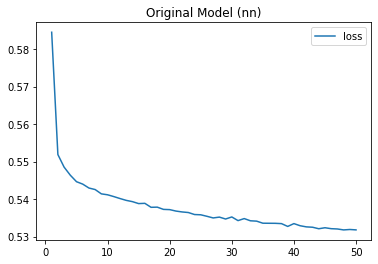

In [386]:
# Visualize the nn model plot where the y-axis displays the loss metric
# Plot the loss
fit_model_plot.plot(y="loss", title='Original Model (nn)')

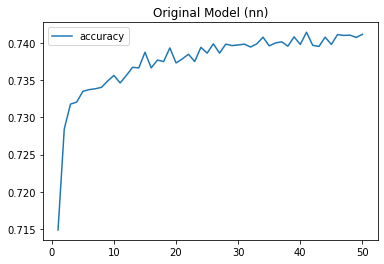

In [387]:
# Visualize the original nn model plot where the y-axis displays the accuracy metric
# Plot the accuracy
fit_model_plot.plot(y="accuracy", title='Original Model (nn)')

In [388]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model_loss_A1, model_accuracy_A1

# Display the model loss and accuracy results in nn_A1
print(f"nn_A1 scores: Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
nn_A1 scores: Loss: 0.5751816034317017, Accuracy: 0.7124198079109192


##Plot Loss and Accuracy of Alternative Model 1 nn_A1##

In [389]:
# nn_A1 Plot
# Create a DataFrame using the model history and an index parameter
fit_model_A1_plot = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))

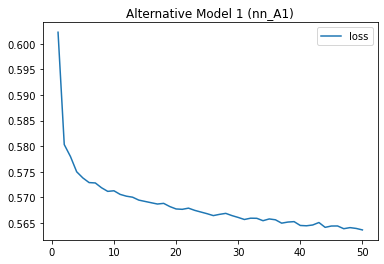

In [390]:
# Visualize the nn_A1 model plot where the y-axis displays the loss metric
# Plot the loss
fit_model_A1_plot.plot(y="loss", title='Alternative Model 1 (nn_A1)')

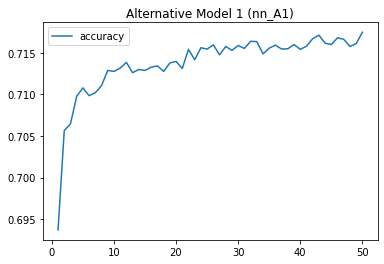

In [391]:
# Visualize the nn_A2 model plot where the y-axis displays the accuracy metric
# Plot the accuracy
fit_model_A1_plot.plot(y="accuracy", title='Alternative Model 1 (nn_A1)')

In [392]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = model_loss_A2, model_accuracy_A2

# Display the model loss and accuracy results in nn_A2
print(f"nn_A2 scores: Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
nn_A2 scores: Loss: 0.5843042135238647, Accuracy: 0.7103207111358643


##Plot Loss and Accuracy of Alternative Model 2 nn-A2##

In [393]:
# nn_A2 Plot
# Create a DataFrame using the model history and an index parameter
fit_model_A2_plot = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))

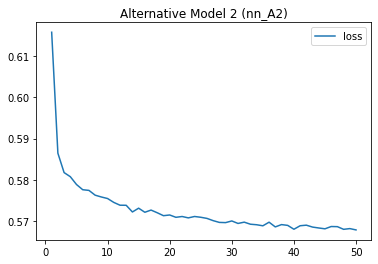

In [398]:
# Visualize the nn_A2 model plot where the y-axis displays the loss metric
# Plot the loss
fit_model_A2_plot.plot(y="loss", title='Alternative Model 2 (nn_A2)')

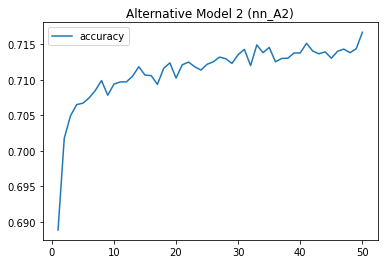

In [399]:
# Vizualize the nn_A2 model plot where the y-axis displays the accuracy metric
# Plot the accuracy
fit_model_A2_plot.plot(y="accuracy", title='Alternative Model 2 (nn_A2)')

### Step 3: Save each of your alternative models as an HDF5 file.


In [396]:
# Set the file path for the first alternative model
file_path = 'AlphabetSoup_nn_A1.h5'

# Export your model to a HDF5 file
nn_A1.save(file_path)

print(f'Alternative Model 1 nn_A1 is saved in {file_path}')

Alternative Model 1 nn_A1 is saved in AlphabetSoup_nn_A1.h5


In [397]:
# Set the file path for the second alternative model
file_path = 'AlphabetSoup_nn_A2.h5'

# Export your model to a HDF5 file
nn_A2.save(file_path)

print(f'Alternative Model 2 nn_A2 is saved in {file_path}')

Alternative Model 2 nn_A2 is saved in AlphabetSoup_nn_A2.h5
